In [74]:
#read csv valid responses

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


valid_responses = pd.read_csv('valid_responses.csv')
valid_responses.head(1)

total_valid_responses = len(valid_responses)

In [75]:
def plot_qa_vs_not_qa(quantified_role_counts, not_quantified_role_counts, title, rotate=None):
    # Add a new column to each DataFrame to distinguish the groups
    quantified_role_counts['Type'] = 'Quantified'
    not_quantified_role_counts['Type'] = 'Did not quantify'

    # Concatenate the two DataFrames
    combined_data = pd.concat([quantified_role_counts, not_quantified_role_counts])


    # Plotting
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=combined_data, x=title, y='Number of Respondents', hue='Type', palette='Set2')

    # Set chart title and labels
    plt.title(title + ' of those who quantified Vs did not quantify')
    plt.xlabel(title)
    plt.ylabel('Number of Respondents')
    plt.yticks(range(0, max(combined_data['Number of Respondents']) + 1 , 2))
    plt.tight_layout()

    # Rotate
    if rotate:
        plt.xticks(rotation=rotate)

    #save fig with title
    plt.savefig('Plots/Disc_' + title + '.svg')

    # Show the plot
    plt.show()

# Those who formally or informally quantifiied

In [76]:
#filter records for Q11, Q13, Q16
quantified_any = valid_responses.loc[(valid_responses['Q11'].str.contains('Yes,')) | (valid_responses['Q13'].str.contains('Yes,')) | (valid_responses['Q16'].str.contains('Yes,'))]
len(quantified_any)

35

# Those who DID NOT formally or informally quantify

In [77]:
did_not_quantify_any = valid_responses.loc[((valid_responses['Q11'].str.contains('NO,')) | (valid_responses['Q13'].str.contains('NO,')) | (valid_responses['Q16'].str.contains('NO,')))]
len(did_not_quantify_any)

24

# Practitioner profile and tendency to quantify

## Role at Work of those who quantified Vs did not quantify

In [78]:
def get_role_counts(role_df):
    role_counts = role_df['Q3'].value_counts().reset_index()
    role_counts.columns = ['Role at Work', 'Number of Respondents']
    role_counts['Role at Work'] = role_counts['Role at Work'].str.replace('/', '/\n').str.replace('Quality Assurance Engineer (QAE)', 'QA Engineer')

    #calculate percentages
    # role_counts['Perentage of respondents'] = role_counts['Number of Respondents']/len(valid_responses)*100
    return role_counts


/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


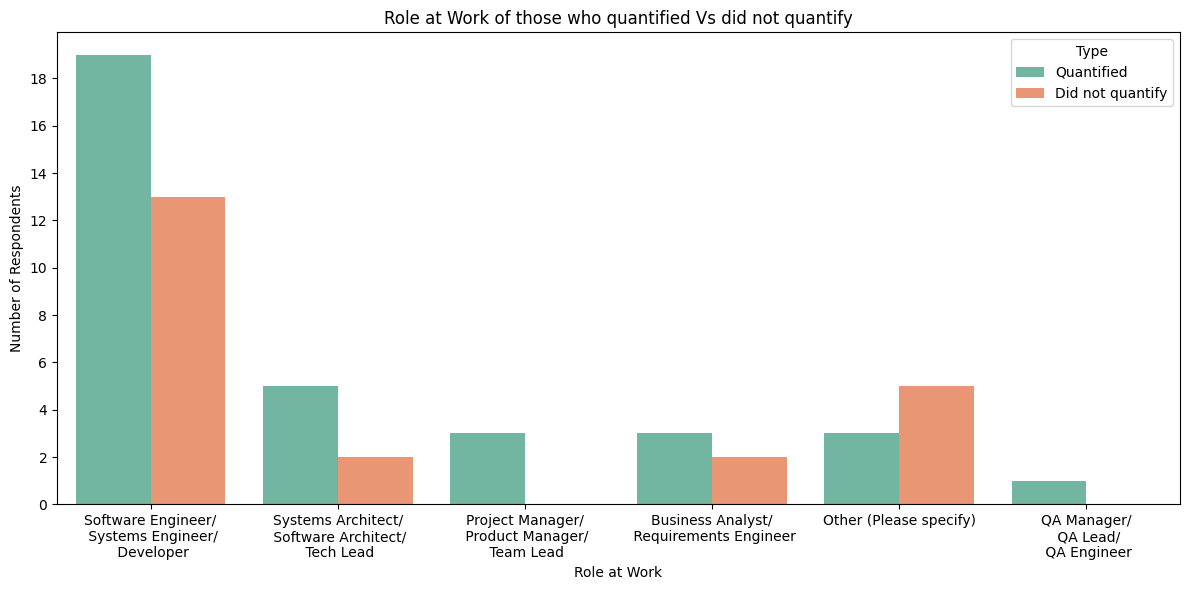

In [79]:
plot_qa_vs_not_qa(get_role_counts(quantified_any), get_role_counts(did_not_quantify_any), 'Role at Work')

#save fig to plots folder

#plt.savefig('plots/D_role_at_work.svg')



## Experience at Work of those who quantified Vs did not quantify

In [80]:
def get_exp_counts(exp_df):
    role_exp_counts = exp_df['Q5'].value_counts().reset_index()
    role_exp_counts.columns = ['Experience at Work', 'Number of Respondents']
    role_exp_counts['Experience at Work'] = role_exp_counts['Experience at Work'] #.str.replace('/', '/\n')

    #calculate percentages
    # role_exp_counts['Perentage of respondents'] = role_exp_counts['Number of Respondents']/role_exp_counts['Number of Respondents'].sum()*100

    # Calculate proportions
    #role_counts['Proportion'] = role_counts['Number of Respondents']

    return role_exp_counts

/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


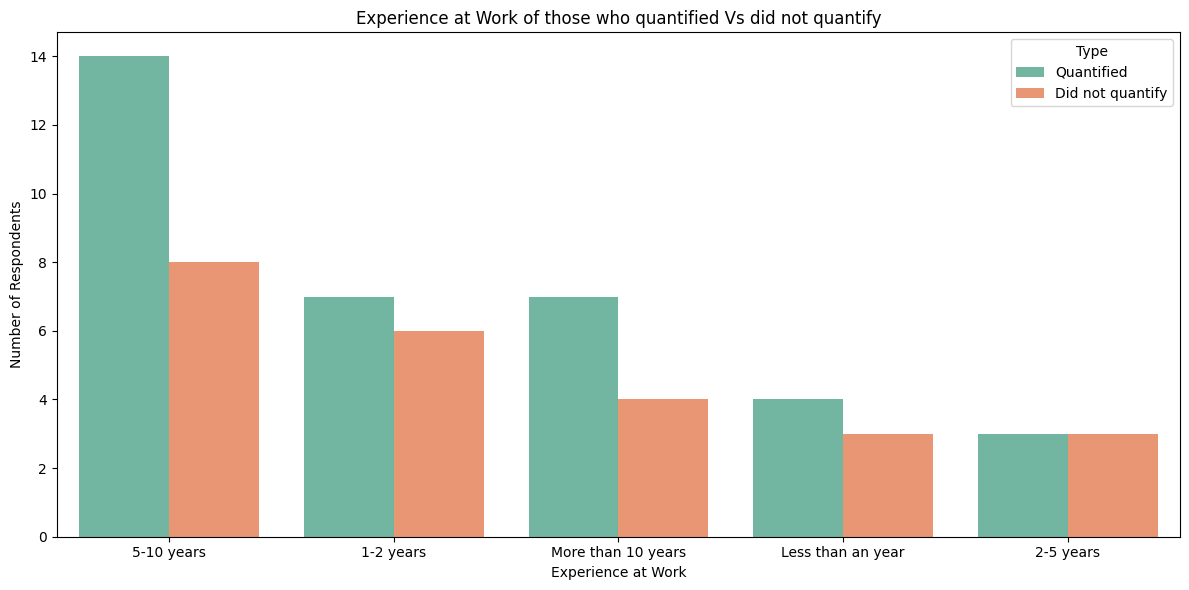

In [81]:
#plot_qa_vs_not_qa(get_exp_counts(quantified_cost), get_exp_counts(not_quantified_cost), 'Experience at Work')

plot_qa_vs_not_qa(get_exp_counts(quantified_any), get_exp_counts(did_not_quantify_any), 'Experience at Work')


#save fig to plots folder

#plt.savefig('plots/D_exp_at_work.svg')

## Primary activities performed by those who quantified Vs did not quantify

In [82]:

def data_formatting(activity_df):
    activity_df['Q50'] = activity_df['Q50'].str.replace(', e.g.,', '\n e.g. ')
    activity_df['Q50'] = activity_df['Q50'].str.replace(', i.e., ', '\n i.e. ')
    activity_df['Q50'] = activity_df['Q50'].str.replace('System Requirements Specification (SRS), as User Stories, as Use Case Diagrams', '\n System Requirements Specification (SRS) \n or as User Stories or as Use Case Diagrams')
    activity_df['Q50'] = activity_df['Q50'].str.replace('through stakeholder interviews, user forums, and observations', '\n through stakeholder interviews or user forums or observations')
    activity_df['Q50'] = activity_df['Q50'].str.replace('to validate that requirements have been implemented correctly, to test that the software functions', 'to validate that requirements have been implemented correctly \n or to test that the software functions')
    activity_df['Q50'] = activity_df['Q50'].str.replace('what requirements to implement, what to refactor', '\n what requirements to implement or what to refactor')
    activity_df['Q50'] = activity_df['Q50'].str.replace('implement features that satisfy', 'implement features \n that satisfy')
    activity_df['Q50'] = activity_df['Q50'].str.replace('design decisions to accommodate', 'design decisions to \n accommodate')
    activity_df['Q50'] = activity_df['Q50'].str.replace('or as User Stories in a', '\n or as User Stories in a')

    #insert_newline(activity_df['Q50'])

In [83]:


def get_activity_counts(activity_df):

    data_formatting(activity_df)

    activities = activity_df['Q50'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)

    activity_counts = activities.value_counts().reset_index()

    #rename columns to Primary activities performed and Number of Respondents

    activity_counts.columns = ['Primary activities performed', 'Number of Respondents']
    #calculate percentages
    activity_counts['Perentage of respondents'] = activity_counts['Number of Respondents']/activity_counts['Number of Respondents'].sum()*100

    return activity_counts


/var/folders/_n/834qbp2x5yx2z7lztkn63hh40000gn/T/ipykernel_9627/292497638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_df['Q50'] = activity_df['Q50'].str.replace(', e.g.,', '\n e.g. ')
/var/folders/_n/834qbp2x5yx2z7lztkn63hh40000gn/T/ipykernel_9627/292497638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_df['Q50'] = activity_df['Q50'].str.replace(', i.e., ', '\n i.e. ')
/var/folders/_n/834qbp2x5yx2z7lztkn63hh40000gn/T/ipykernel_9627/292497638.py:4: SettingWithCopyWarning: 
A va

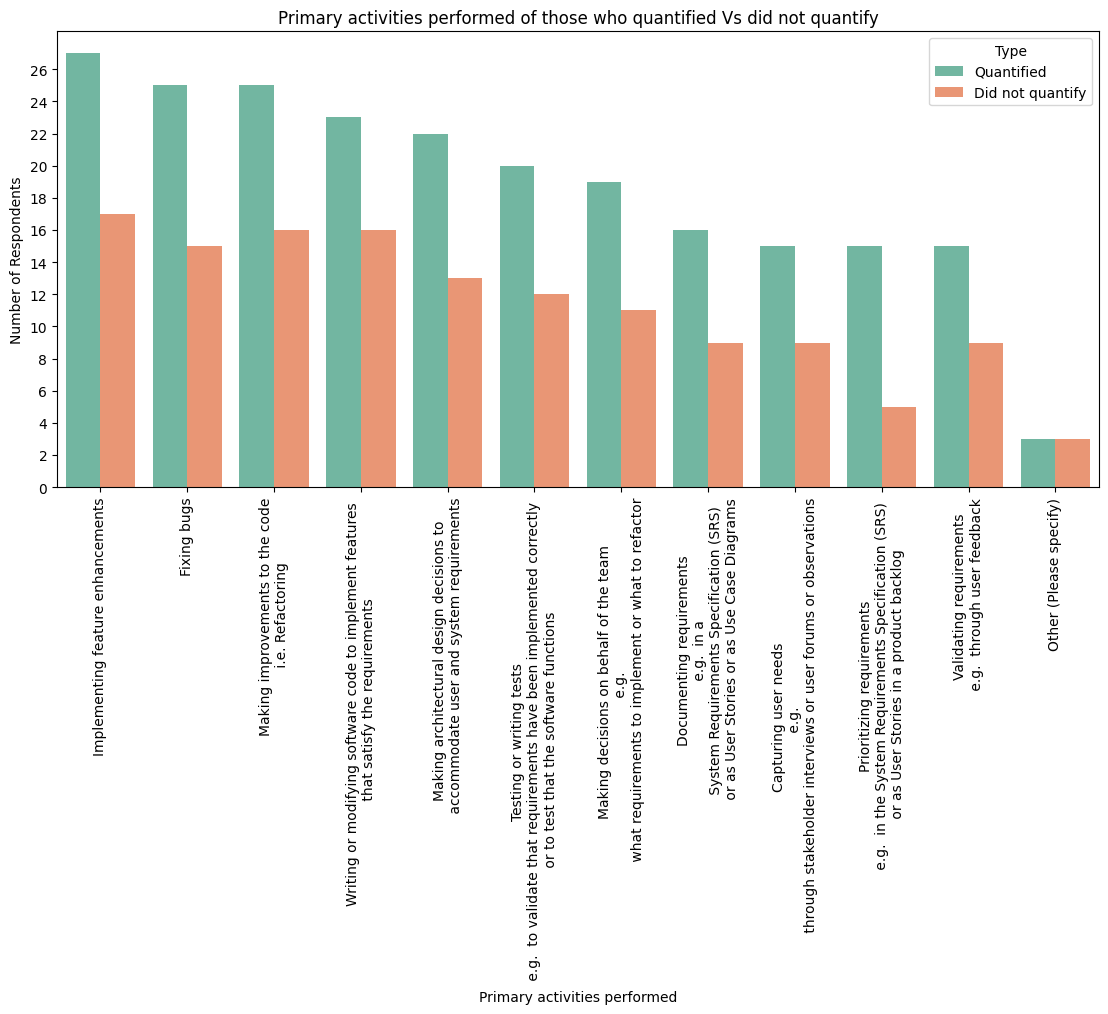

In [84]:
#plot_qa_vs_not_qa(get_activity_counts(quantified_cost), get_activity_counts(not_quantified_cost), 'Primary activities performed', rotate=90)
plot_qa_vs_not_qa(get_activity_counts(quantified_any), get_activity_counts(did_not_quantify_any), 'Primary activities performed', rotate=90)


#save fig to plots folder

#plt.savefig('plots/D_activities_at_work.svg')

# Company profile and tendency to quantify

## Type of Organization

In [85]:
def get_org_counts(org_df):
    org_counts = org_df['Q34'].value_counts().reset_index()
    org_counts.columns = ['Type of Organization', 'Number of Respondents']
    org_counts['Type of Organization'] = org_counts['Type of Organization'].str.replace('-', '-\n')

    #calculate percentages
    # org_counts['Perentage of respondents'] = org_counts['Number of Respondents']/org_counts['Number of Respondents'].sum()*100

    # Calculate proportions
    #role_counts['Proportion'] = role_counts['Number of Respondents']

    return org_counts


/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


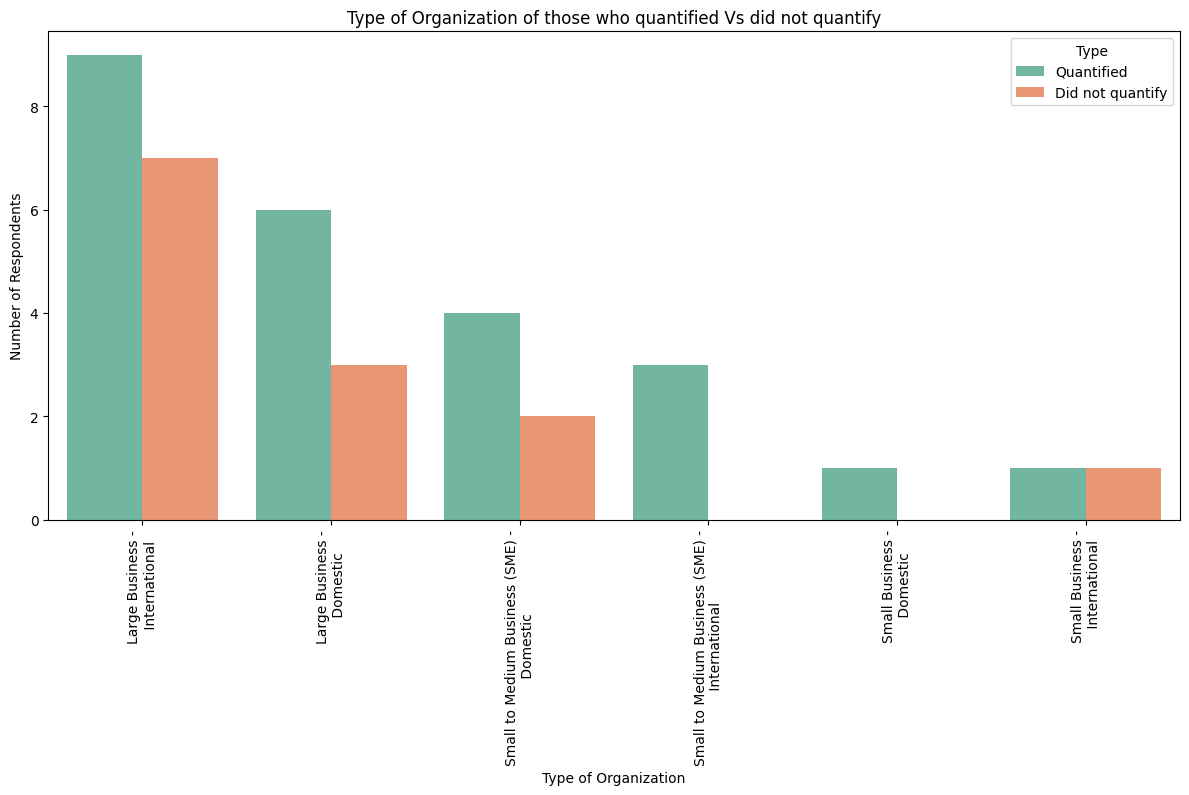

In [86]:
#plot_qa_vs_not_qa(get_org_counts(quantified_cost), get_org_counts(not_quantified_cost), 'Type of Organization', rotate=90)
plot_qa_vs_not_qa(get_org_counts(quantified_any), get_org_counts(did_not_quantify_any), 'Type of Organization', rotate=90)


#save fig to plots folder

#plt.savefig('plots/D_type_of_org.svg')

## Development Methodology

In [87]:
def get_sw_dev_method_counts(dev_method_df):
    dev_method_counts = dev_method_df['Q37'].value_counts().reset_index()
    dev_method_counts.columns = ['Software Dev Method', 'Number of Respondents']
    dev_method_counts['Software Dev Method'] = dev_method_counts['Software Dev Method'].str.replace('/', '/\n').str.replace('and agile', '\n and agile')
    dev_method_counts['Software Dev Method'] = dev_method_counts['Software Dev Method'].str.replace('/', '/\n').str.replace('i.e., ', '\n i.e., ')

    #calculate percentages
    # role_counts['Perentage of respondents'] = role_counts['Number of Respondents']/len(valid_responses)*100
    return dev_method_counts

/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


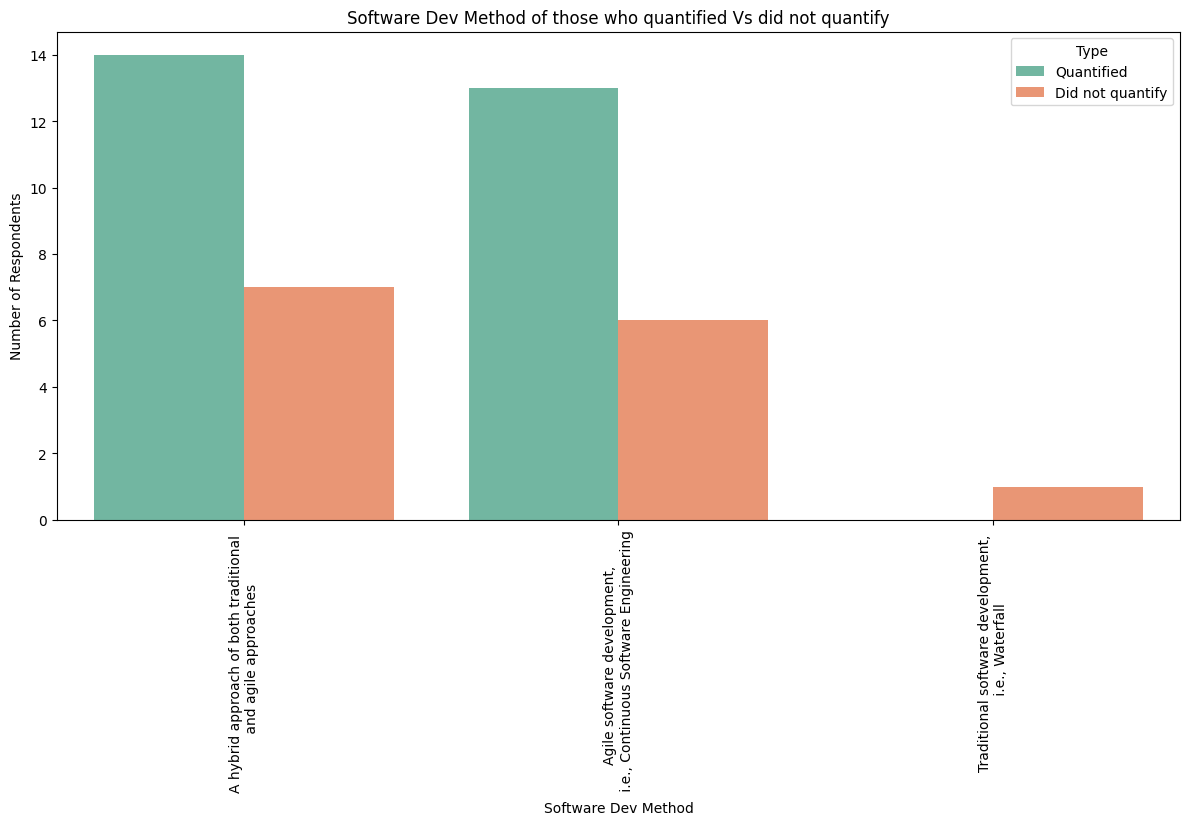

In [88]:
# any activity
plot_qa_vs_not_qa(get_sw_dev_method_counts(quantified_any), get_sw_dev_method_counts(not_quantified_any), 'Software Dev Method', rotate=90)


#save fig to plots folder

#plt.savefig('plots/D_SW_dev_method.svg')

## Application Domain

In [89]:

def get_app_domain_counts(df):

    #data_formatting(data_formatting)

    domains = df['Q35'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)

    app_domain_counts = domains.value_counts().reset_index()

    #rename columns to Primary activities performed and Number of Respondents

    app_domain_counts.columns = ['Appllication Domains', 'Number of Respondents']
    #calculate percentages
    app_domain_counts['Perentage of respondents'] = app_domain_counts['Number of Respondents']/app_domain_counts['Number of Respondents'].sum()*100

    return app_domain_counts


/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jupelk/Documents/PhD Experiments/.venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


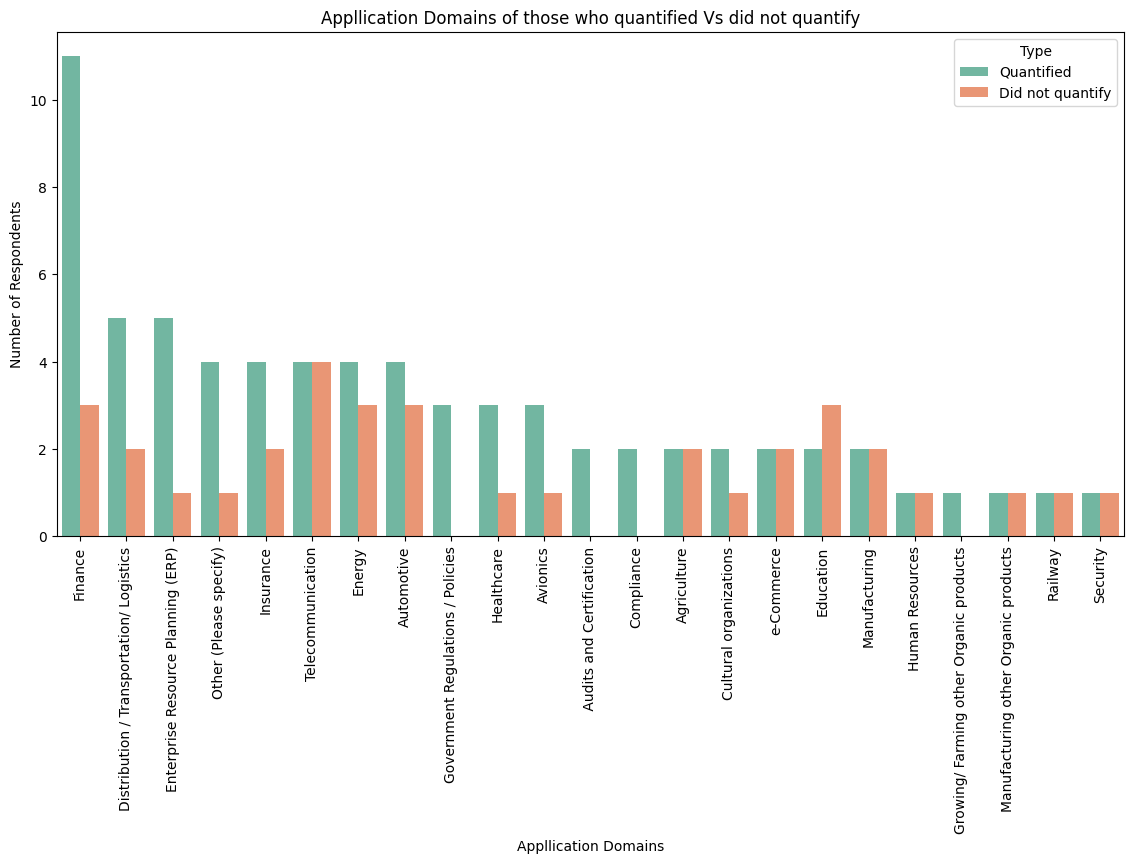

In [90]:
# any activity
plot_qa_vs_not_qa(get_app_domain_counts(quantified_any), get_app_domain_counts(not_quantified_any), 'Appllication Domains', rotate=90)


#save fig to plots folder

#plt.savefig('plots/D_domain.svg')

# Quantification behaviours during a significant incident

## omparison of quantification efforts for top three RTD instances fixed during the critical incident

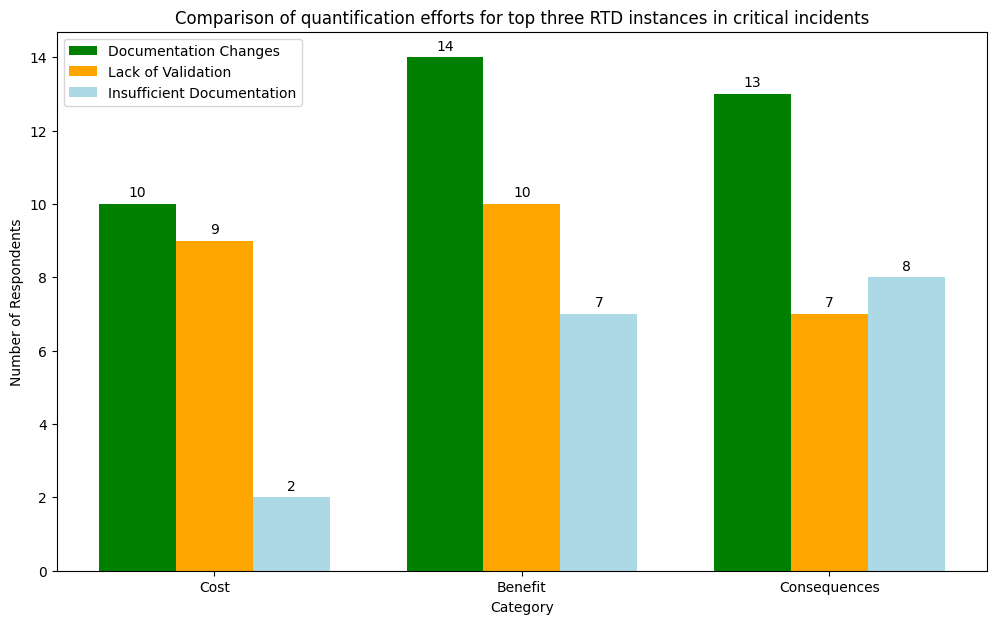

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

def filter_responses(dataframe, question_col, phrase, response_col, response):
    contains_phrase = dataframe[question_col].str.contains(phrase, case=False, na=False)
    filtered_records = dataframe[contains_phrase]
    contains_response = filtered_records[response_col].str.contains(response, case=False, na=False)
    final_filtered_records = filtered_records[contains_response]
    return final_filtered_records

# Assuming valid_responses is your DataFrame that contains all the survey data

# Filter data for each category and requirement issue
documentation_Q11 = filter_responses(valid_responses, 'Q8', 'Changes in the requirements documentation', 'Q11', 'Yes')
documentation_Q13 = filter_responses(valid_responses, 'Q8', 'Changes in the requirements documentation', 'Q13', 'Yes')
documentation_Q16 = filter_responses(valid_responses, 'Q8', 'Changes in the requirements documentation', 'Q16', 'Yes')

validation_Q11 = filter_responses(valid_responses, 'Q8', 'Lack of requirements validation with the user', 'Q11', 'Yes')
validation_Q13 = filter_responses(valid_responses, 'Q8', 'Lack of requirements validation with the user', 'Q13', 'Yes')
validation_Q16 = filter_responses(valid_responses, 'Q8', 'Lack of requirements validation with the user', 'Q16', 'Yes')

insufficient_doc_Q11 = filter_responses(valid_responses, 'Q8', 'Insufficient documentation of requirement', 'Q11', 'Yes')
insufficient_doc_Q13 = filter_responses(valid_responses, 'Q8', 'Insufficient documentation of requirement', 'Q13', 'Yes')
insufficient_doc_Q16 = filter_responses(valid_responses, 'Q8', 'Insufficient documentation of requirement', 'Q16', 'Yes')

# Organize data for plotting
data = {
    'Category': ['Cost', 'Benefit', 'Consequences'],
    'Documentation': [len(documentation_Q11), len(documentation_Q13), len(documentation_Q16)],
    'Validation': [len(validation_Q11), len(validation_Q13), len(validation_Q16)],
    'Insufficient Documentation': [len(insufficient_doc_Q11), len(insufficient_doc_Q13), len(insufficient_doc_Q16)]
}

df = pd.DataFrame(data)

# Plotting the grouped bar chart
plt.figure(figsize=(12, 7))
bar_width = 0.25
index = range(len(df['Category']))
bar1 = plt.bar(index, df['Documentation'], width=bar_width, label='Documentation Changes', color='green')
bar2 = plt.bar([p + bar_width for p in index], df['Validation'], width=bar_width, label='Lack of Validation', color='orange')
bar3 = plt.bar([p + bar_width * 2 for p in index], df['Insufficient Documentation'], width=bar_width, label='Insufficient Documentation', color='lightblue')

plt.xlabel('Category')
plt.ylabel('Number of Respondents')
plt.title('Comparison of quantification efforts for top three RTD instances in critical incidents')
plt.xticks([p + bar_width for p in index], df['Category'])
plt.legend()

# Add labels above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

#Save figure
plt.savefig('Plots/Disc_top_three_RTD_instances.svg')

plt.show()


# Agreement regarding concepts to quantify for decision-making

## Those who Agreed Vs Did not Agree and Those who Quantified Vs Did not Quantify

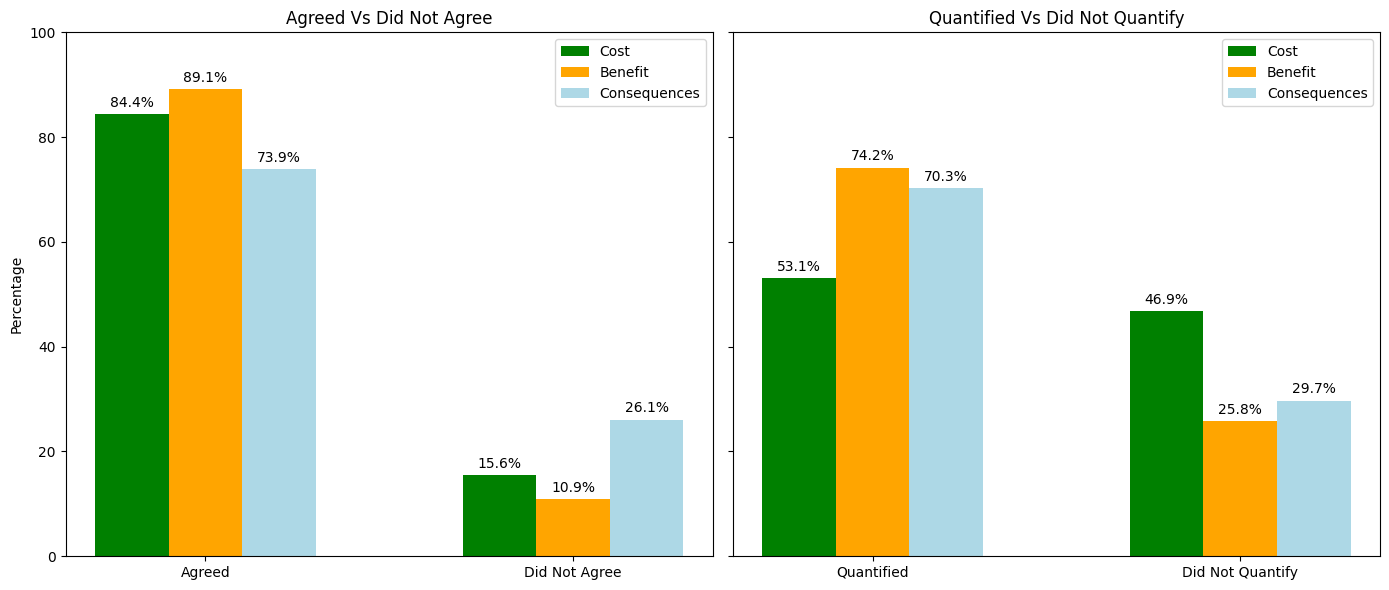

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the first table (Quantified/Did Not Quantify) with percentages
quantified_data = {
    'Categories': ['Quantified', 'Did Not Quantify'],
    'Cost': [(17/32)*100, (15/32)*100],
    'Benefit': [(23/31)*100, (8/31)*100],
    'Consequences': [(26/37)*100, (11/37)*100]
}

# Data for the second table (Agreed/Did Not Agree) with percentages
agreed_data = {
    'Categories': ['Agreed', 'Did Not Agree'],
    'Cost': [(38/45)*100, (7/45)*100],
    'Benefit': [(41/46)*100, (5/46)*100],
    'Consequences': [(34/46)*100, (12/46)*100]
}

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Plot for Agreed/Did Not Agree on the left
categories = np.arange(len(agreed_data['Categories']))
width = 0.2

rects1 = axes[0].bar(categories - width, agreed_data['Cost'], width, label='Cost', color='green')
rects2 = axes[0].bar(categories, agreed_data['Benefit'], width, label='Benefit', color='orange')
rects3 = axes[0].bar(categories + width, agreed_data['Consequences'], width, label='Consequences', color='lightblue')
axes[0].set_xticks(categories)
axes[0].set_xticklabels(agreed_data['Categories'])
axes[0].set_ylim(0, 100)
axes[0].set_title('Agreed Vs Did Not Agree')
axes[0].set_ylabel('Percentage')
axes[0].legend()

# Plot for Quantified/Did Not Quantify on the right
categories = np.arange(len(quantified_data['Categories']))

rects4 = axes[1].bar(categories - width, quantified_data['Cost'], width, label='Cost', color='green')
rects5 = axes[1].bar(categories, quantified_data['Benefit'], width, label='Benefit', color='orange')
rects6 = axes[1].bar(categories + width, quantified_data['Consequences'], width, label='Consequences', color='lightblue')
axes[1].set_xticks(categories)
axes[1].set_xticklabels(quantified_data['Categories'])
axes[1].set_ylim(0, 100)
axes[1].set_title('Quantified Vs Did Not Quantify')
axes[1].legend()

# Add labels above the bars
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, axes[0])
autolabel(rects2, axes[0])
autolabel(rects3, axes[0])
autolabel(rects4, axes[1])
autolabel(rects5, axes[1])
autolabel(rects6, axes[1])

fig.tight_layout()

#Save figure
plt.savefig('Plots/Disc_agree_vs_not_and_quantified_vs_not.svg')

plt.show()


## Agreed and quantified vs did NOT quantify

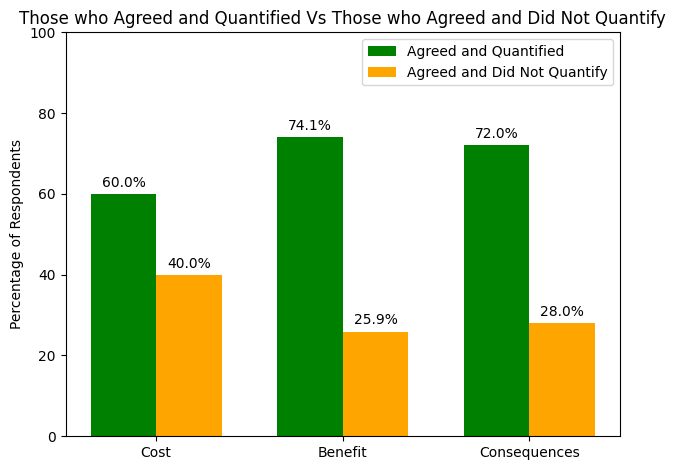

In [113]:
import matplotlib.pyplot as plt
import numpy as np

# Data as percentages
total_respondents = {
    'Cost': 25,  # 15 + 10
    'Benefit': 27,  # 20 + 7
    'Consequences':25   # 18 + 7
}

agreed_and_quantified_percent = [
    (15 / total_respondents['Cost']) * 100,
    (20 / total_respondents['Benefit']) * 100,
    (18 / total_respondents['Consequences']) * 100
]

agreed_and_did_not_quantify_percent = [
    (10 / total_respondents['Cost']) * 100,
    (7 / total_respondents['Benefit']) * 100,
    (7 / total_respondents['Consequences']) * 100
]

# Categories
categories = ['Cost', 'Benefit', 'Consequences']
x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

# Create subplots
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, agreed_and_quantified_percent, width, label='Agreed and Quantified', color='green')
rects2 = ax.bar(x + width/2, agreed_and_did_not_quantify_percent, width, label='Agreed and Did Not Quantify', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of Respondents')
ax.set_title('Those who Agreed and Quantified Vs Those who Agreed and Did Not Quantify')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylim(0, 100)
ax.legend()

# Add labels above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()


#Save figure
plt.savefig('Plots/Disc_Those_who_agree_and_quantified_vs_did_not.svg')

plt.show()
